### 사용 가능한 모델
- LinearRegression
- RandomForestRegressor
- DecisionTreeRegressor
- Ridge, Lasso
- GradientBoostingRegressor
- XGBRegressor
- LGBMRgresor

### 평가 지표
- MAE (Mean Absolute Error)

### feature 살펴보기
- 연속 수치형 : '총세대수', '전용면적', '공가수', '임대보증금', '임대료','지하철', '버스정류장', '단지내주차면수'
- 카테고리형 : '단지코드', '지역', '공급유형','자격유형'
- LabelEncoder 컬럼 : '임대건물구분_lb', '지역_lb', '공급유형_lb', '자격유형_lb'
- OneHoteEncoder 컬럼 : 
    - '상가', '아파트'
    - '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도','충청북도' 
    - '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)','공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택'
    - 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams

warnings.filterwarnings(action='ignore')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False

In [2]:
path = './data/'

train = pd.read_csv(path+"train_preprocessed.csv")
train_errx = pd.read_csv(path+"train_errx_preprocessed.csv")
test = pd.read_csv(path+"test_preprocessed.csv")
sub = pd.read_csv(path + 'sample_submission.csv')

train.shape, train_errx.shape, test.shape

((2952, 62), (5792, 62), (1008, 61))

In [3]:
print(len(train.columns))
print(len(test.columns))

train.columns

62
61


Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스정류장', '단지내주차면수', '임대건물구분_lb', '상가',
       '아파트', '지역_lb', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도',
       '충청북도', '공급유형_lb', '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택', '자격유형_lb', 'A', 'B',
       'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
       '등록차량수'],
      dtype='object')

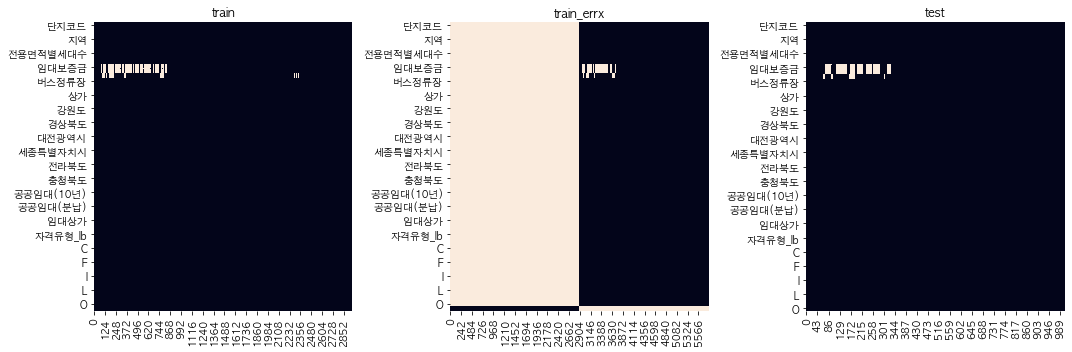

In [4]:
# 결측치 확인 시각화
sel = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스정류장', '단지내주차면수', ]
fig = plt.figure(figsize=(15,5))
plt.subplot(131)
sns.heatmap(train.isnull().T, cbar=False)
plt.title("train")
plt.subplot(132)
sns.heatmap(train_errx.isnull().T, cbar=False)
plt.title("train_errx")
plt.subplot(133)
sns.heatmap(test.isnull().T, cbar=False)
plt.title("test")
plt.tight_layout()

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 62 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   단지코드       2952 non-null   object 
 1   총세대수       2952 non-null   int64  
 2   임대건물구분     2952 non-null   object 
 3   지역         2952 non-null   object 
 4   공급유형       2952 non-null   object 
 5   전용면적       2952 non-null   float64
 6   전용면적별세대수   2952 non-null   int64  
 7   공가수        2952 non-null   float64
 8   자격유형       2952 non-null   object 
 9   임대보증금      2383 non-null   object 
 10  임대료        2383 non-null   object 
 11  지하철        2741 non-null   float64
 12  버스정류장      2952 non-null   float64
 13  단지내주차면수    2952 non-null   float64
 14  임대건물구분_lb  2952 non-null   int64  
 15  상가         2952 non-null   float64
 16  아파트        2952 non-null   float64
 17  지역_lb      2952 non-null   int64  
 18  강원도        2952 non-null   float64
 19  경기도        2952 non-null   float64
 20  경상남도    

## 피처 스케일링
- 표준화 Standardization → StandardScaler
    - Linear Regression, Logistic Regression : 데이터가 가우시안 분포를 가진다고 가정
- 정규화 Normalization → MinMaxScaler
    - OneHotEncoding 된 feature들 
    
> 만약에 LinearRegression 모델을 사용한다면 연속 수치형 feature들은 StandardScaler로, OneHotEncoding 된 feature들은 MinMaxScaler로 피처스케일링 시켜야할 것 같다.
    

array([[<AxesSubplot:title={'center':'총세대수'}>,
        <AxesSubplot:title={'center':'전용면적'}>],
       [<AxesSubplot:title={'center':'공가수'}>,
        <AxesSubplot:title={'center':'지하철'}>],
       [<AxesSubplot:title={'center':'버스정류장'}>,
        <AxesSubplot:title={'center':'단지내주차면수'}>]], dtype=object)

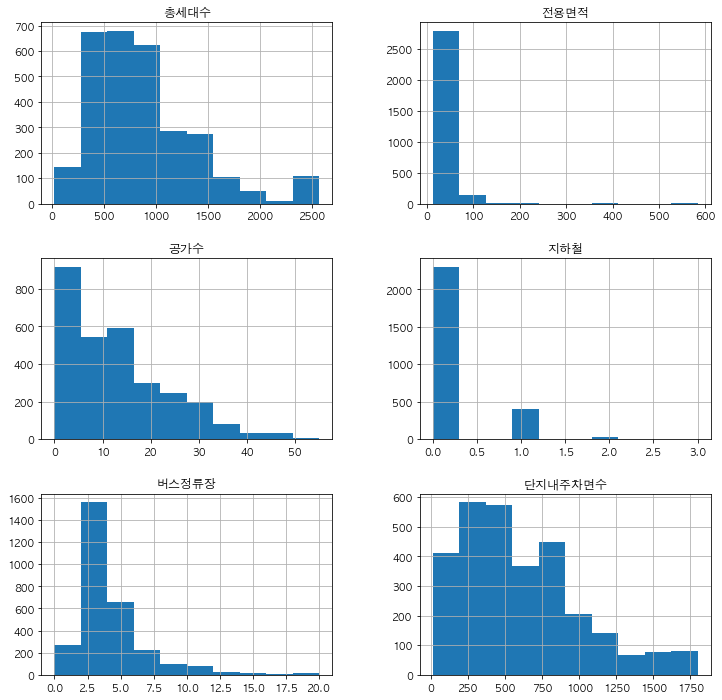

In [6]:
# 연속 수치형 feature 분포 시각화
train_num = train[['총세대수', '전용면적', '공가수', '임대보증금', '임대료','지하철', '버스정류장', '단지내주차면수']]
train_num.hist(figsize=(12,12)) # bins=10(default)

### 원핫인코딩 피처들의 Standardization
*0,1 로 구별되었던 레이블 값들이 StandardScaler를 거치면 이상한 값이 된다.
일단 LinearRegression 모델에서는 StandardScaler가 최적이라고 하니깐 이 스케일러를 사용하되 원핫인코딩 피처들에는 적절한 스케일러는 아니라는 것을 알아두자*



In [7]:
col = train[['상가']]
print(col.shape)
print(type(col))
col.value_counts()

(2952, 1)
<class 'pandas.core.frame.DataFrame'>


상가 
0.0    2390
1.0     562
dtype: int64

(2952, 1)


(array([2390.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         562.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

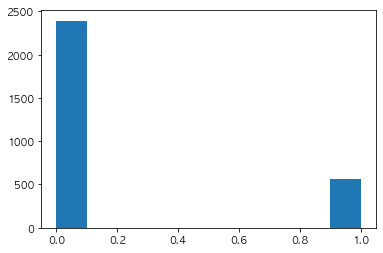

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler() # StandardScaler()
col_scaled = scaler.fit_transform(col)
print(col_scaled.shape)
plt.hist(col_scaled)

### 원핫인코딩 feature 제외하고 
- 결측치 없고, 연속 수치형 피처들만
- StandardScaler
- LinearRegression, KNeighborsRegressor, RandomForestRegressor, DecisionTreeRegressor

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

sel = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '버스정류장', '단지내주차면수' ]
X = train[sel]
y = train[['등록차량수']]

# 피처스케일링
scaler = StandardScaler()
X_nor = scaler.fit_transform(X)

# 모델 _ohx : one-hot-encoding-x
lr_ohx = LinearRegression()
knn_ohx = KNeighborsRegressor()
rf_ohx = RandomForestRegressor()
dt_ohx = DecisionTreeRegressor()

# 회귀는 교차검증
lr_scores = cross_val_score(lr_ohx, X_nor, y,scoring='neg_mean_absolute_error', cv=5) 
knn_scores = cross_val_score(knn_ohx, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
rf_scores = cross_val_score(rf_ohx, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
dt_scores = cross_val_score(dt_ohx, X_nor, y,scoring='neg_mean_absolute_error', cv=5)


lr_score = np.abs(lr_scores.mean())
knn_score = np.abs(knn_scores.mean())
rf_score = np.abs(rf_scores.mean())
dt_score = np.abs(dt_scores.mean())


print("LinearRegression : ", lr_score)
print("KNeighborsRegressor : ", knn_score)
print("RandomForestRegressor : ", rf_score)
print("DecisionTreeRegressor : ", dt_score)


LinearRegression :  156.32564393173757
KNeighborsRegressor :  198.63946393644784
RandomForestRegressor :  154.67588841664517
DecisionTreeRegressor :  190.91179901918608


*RandomForest이 가장 성능이 좋다. Scaler가 StandardScaler가 아니면 더 좋아지지 않을까?*
- 결측치 없고, 연속 수치형 피처들만
- StandardScaler
- LinearRegression, KNeighborsRegressor, RandomForestRegressor, DecisionTreeRegressor

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score

sel = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '버스정류장', '단지내주차면수' ]
X = train[sel]
y = train[['등록차량수']]

# 피처스케일링
scaler = StandardScaler()
X_nor = scaler.fit_transform(X)

# 모델 _ohx : one-hot-encoding-x
lr_ohx = LinearRegression()
knn_ohx = KNeighborsRegressor()
rf_ohx = RandomForestRegressor()
dt_ohx = DecisionTreeRegressor()

# 회귀는 교차검증
lr_scores = cross_val_score(lr_ohx, X_nor, y,scoring='neg_mean_absolute_error', cv=5) 
knn_scores = cross_val_score(knn_ohx, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
rf_scores = cross_val_score(rf_ohx, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
dt_scores = cross_val_score(dt_ohx, X_nor, y,scoring='neg_mean_absolute_error', cv=5)

lr_score = np.abs(lr_scores.mean())
knn_score = np.abs(knn_scores.mean())
rf_score = np.abs(rf_scores.mean())
dt_score = np.abs(dt_scores.mean())

print("LinearRegression : ", lr_score)
print("KNeighborsRegressor : ", knn_score)
print("RandomForestRegressor : ", rf_score)
print("DecisionTreeRegressor : ", dt_score)

score_std = [lr_score, knn_score, rf_score, dt_score ]
# print(score_std)

LinearRegression :  156.32564393173757
KNeighborsRegressor :  198.63946393644784
RandomForestRegressor :  157.48123325590066
DecisionTreeRegressor :  185.49129369927442


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score

sel = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '버스정류장', '단지내주차면수' ]
X = train[sel]
y = train[['등록차량수']]

# 피처스케일링
scaler = MinMaxScaler()
X_nor = scaler.fit_transform(X)

# 모델 _ohx : one-hot-encoding-x
lr_ohx = LinearRegression()
knn_ohx = KNeighborsRegressor()
rf_ohx = RandomForestRegressor()
dt_ohx = DecisionTreeRegressor()

# 회귀는 교차검증
lr_scores = cross_val_score(lr_ohx, X_nor, y,scoring='neg_mean_absolute_error', cv=5) 
knn_scores = cross_val_score(knn_ohx, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
rf_scores = cross_val_score(rf_ohx, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
dt_scores = cross_val_score(dt_ohx, X_nor, y,scoring='neg_mean_absolute_error', cv=5)

lr_score = np.abs(lr_scores.mean())
knn_score = np.abs(knn_scores.mean())
rf_score = np.abs(rf_scores.mean())
dt_score = np.abs(dt_scores.mean())

print("LinearRegression : ", lr_score)
print("KNeighborsRegressor : ", knn_score)
print("RandomForestRegressor : ", rf_score)
print("DecisionTreeRegressor : ", dt_score)

score_mm = [lr_score, knn_score, rf_score, dt_score ]
# print(score_mm)

LinearRegression :  156.32564393173755
KNeighborsRegressor :  198.6258975020792
RandomForestRegressor :  154.88489554045142
DecisionTreeRegressor :  189.39463993805384


- 결과 :
|Model|StandardScaler | MinMaxScaler|
|:--:|:--:|:--:|
|LinearRegression |156.32564393173757 | 156.32564393173755 |
|KNeighborsRegressor |198.63946393644784 | 198.6258975020792|
|RandomForestRegressor|155.15520387163383| 155.7650440448536|
|DecisionTreeRegressor| 194.02490751096965| 185.50136740371104 | 

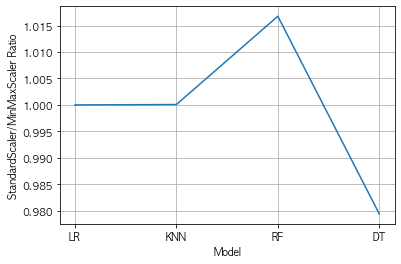

In [12]:
model = ['LR', 'KNN',"RF","DT"]
res = [i / j for i, j in zip(score_std, score_mm)]
plt.plot(model, res)
plt.ylabel('StandardScaler/MinMaxScaler Ratio')
plt.xlabel('Model')
plt.grid()

### 원핫인코딩 feature 포함해서
- 결측치 없는 피처들
- StandardScaler
- LinearRegression, KNeighborsRegressor, RandomForestRegressor, DecisionTreeRegressor

In [13]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스정류장', '단지내주차면수', '임대건물구분_lb', '상가',
       '아파트', '지역_lb', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도',
       '충청북도', '공급유형_lb', '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택', '자격유형_lb', 'A', 'B',
       'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
       '등록차량수'],
      dtype='object')

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score

sel = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '버스정류장', '단지내주차면수',
       '상가','아파트',
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시','부산광역시', 
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도','충청북도',
       '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택',
       'A', 'B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
      ]
X = train[sel]
y = train[['등록차량수']]

# 피처스케일링
scaler = StandardScaler()
X_nor = scaler.fit_transform(X)

# 모델 _ohx : one-hot-encoding
lr_oh = LinearRegression()
knn_oh = KNeighborsRegressor()
rf_oh = RandomForestRegressor()
dt_oh = DecisionTreeRegressor()

# 회귀는 교차검증
lr_scores = cross_val_score(lr_oh, X_nor, y,scoring='neg_mean_absolute_error', cv=5) 
knn_scores = cross_val_score(knn_oh, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
rf_scores = cross_val_score(rf_oh, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
dt_scores = cross_val_score(dt_oh, X_nor, y,scoring='neg_mean_absolute_error', cv=5)

lr_score = np.abs(lr_scores.mean())
knn_score = np.abs(knn_scores.mean())
rf_score = np.abs(rf_scores.mean())
dt_score = np.abs(dt_scores.mean())

print("LinearRegression : ", lr_score)
print("KNeighborsRegressor : ", knn_score)
print("RandomForestRegressor : ", rf_score)
print("DecisionTreeRegressor : ", dt_score)

score_std = [lr_score, knn_score, rf_score, dt_score ]
print(score_std)

LinearRegression :  504469540374455.8
KNeighborsRegressor :  186.31774607817832
RandomForestRegressor :  154.28122368866326
DecisionTreeRegressor :  188.69612090969053
[504469540374455.8, 186.31774607817832, 154.28122368866326, 188.69612090969053]


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score

sel = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '버스정류장', '단지내주차면수',
       '상가','아파트',
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시','부산광역시', 
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도','충청북도',
       '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택',
       'A', 'B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
      ]
X = train[sel]
y = train[['등록차량수']]

# 피처스케일링
scaler = MinMaxScaler()
X_nor = scaler.fit_transform(X)

# 모델 _ohx : one-hot-encoding-x
lr_oh = LinearRegression()
knn_oh = KNeighborsRegressor()
rf_oh = RandomForestRegressor()
dt_oh = DecisionTreeRegressor()

# 회귀는 교차검증
lr_scores = cross_val_score(lr_oh, X_nor, y,scoring='neg_mean_absolute_error', cv=5) 
knn_scores = cross_val_score(knn_oh, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
rf_scores = cross_val_score(rf_oh, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
dt_scores = cross_val_score(dt_oh, X_nor, y,scoring='neg_mean_absolute_error', cv=5)

lr_score = np.abs(lr_scores.mean())
knn_score = np.abs(knn_scores.mean())
rf_score = np.abs(rf_scores.mean())
dt_score = np.abs(dt_scores.mean())

print("LinearRegression : ", lr_score)
print("KNeighborsRegressor : ", knn_score)
print("RandomForestRegressor : ", rf_score)
print("DecisionTreeRegressor : ", dt_score)

score_mm = [lr_score, knn_score, rf_score, dt_score ]
print(score_mm)

LinearRegression :  26440014296718.7
KNeighborsRegressor :  179.28349823625572
RandomForestRegressor :  152.54987109466862
DecisionTreeRegressor :  179.77170380567267
[26440014296718.7, 179.28349823625572, 152.54987109466862, 179.77170380567267]


- 결과 :
|Model|StandardScaler | MinMaxScaler|
|:--:|:--:|:--:|
|LinearRegression |504469540374455.8 | 26440014296718.7 |
|KNeighborsRegressor |186.31774607817832 | 179.28349823625572|
|RandomForestRegressor|153.33925195445812| 152.7260943072643|
|DecisionTreeRegressor| 179.89881327253434| 172.7188798072787 | 
 

In [16]:

sel = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '버스정류장', '단지내주차면수',
       '상가','아파트',
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시','부산광역시', 
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도','충청북도',
       '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택',
       'A', 'B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
      ]

X_train = train[sel]
y_train = train['등록차량수']
X_test = test[sel]

scaler = MinMaxScaler()
X_train_nor = scaler.fit_transform(X_train)
X_test_nor = scaler.fit_transform(X_test)

model = RandomForestRegressor(n_jobs=-1, random_state=0)
model.fit(X_train_nor, y_train)
y_pred = model.predict(X_test_nor)

print(y_pred.shape)
y_pred

(1008,)


array([690.26, 719.88, 700.73, ..., 220.61, 212.97, 227.54])

In [17]:
test['등록차량수'] = y_pred
test['단지별차량수평균'] = test.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test.drop_duplicates(['단지코드'], keep='first').reset_index()
test_new.head()

,index,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,...,H,I,J,K,L,M,N,O,등록차량수,단지별차량수평균
0,0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,690.26,704.012500
1,8,C1128,1354,아파트,경기도,국민임대,39.79,368,9.0,H,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1043.39,1056.370000
2,17,C1456,619,아파트,부산광역시,국민임대,33.40,82,18.0,A,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.98,522.696667
3,26,C1840,593,아파트,전라북도,국민임대,39.57,253,7.0,A,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,494.75,499.702500
4,30,C1332,1297,아파트,경기도,국민임대,39.99,282,11.0,H,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1032.87,1039.792500


In [18]:
set(sub['code']) - set(test_new["단지코드"])

{'C1327', 'C2335', 'C2675'}

In [19]:
final_df = pd.merge(sub, test_new, left_on='code', right_on='단지코드',how='left')
final_df = final_df[["code","단지별차량수평균"]]
final_df.columns= ["code","num"]
print(final_df.shape)
final_df

(150, 2)


,code,num
0,C1072,704.012500
1,C1128,1056.370000
2,C1456,522.696667
3,C1840,499.702500
4,C1332,1039.792500
...,...,...
145,C2456,216.527500
146,C1266,446.398000
147,C2152,26.690000
148,C1267,477.738182


In [20]:
final_df[(final_df['code']=='C1327')|(final_df['code']=='C2335')|((final_df['code']=='C2675'))]

,code,num
77,C2675,NaN
130,C1327,NaN
140,C2335,NaN


In [21]:
# 'C1327', 'C2335', 'C2675'
final_df.loc[(final_df['code']=='C1327'),'num'] = 0 
final_df.loc[(final_df['code']=='C2335'),'num'] = 0 
final_df.loc[(final_df['code']=='C2675'),'num'] = 0 

In [22]:
final_df[(final_df['code']=='C1327')|(final_df['code']=='C2335')|((final_df['code']=='C2675'))]

,code,num
77,C2675,0.0
130,C1327,0.0
140,C2335,0.0


In [23]:
final_df.to_csv(path + "rf_1st_submission.csv", index=False)
final_df

,code,num
0,C1072,704.012500
1,C1128,1056.370000
2,C1456,522.696667
3,C1840,499.702500
4,C1332,1039.792500
...,...,...
145,C2456,216.527500
146,C1266,446.398000
147,C2152,26.690000
148,C1267,477.738182


> 115.29311 (255위)